# 1. Logistic regression with Python
## 1.1 Preparation of imaginary data

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [ ]:
from torch import nn

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # torch.Size([6, 2])
y_data = [[0], [0], [0], [1], [1], [1]] # torch.Size([6, 1])
X = torch.FloatTensor(x_data)
Y = torch.FloatTensor(y_data)

## 1.2 Logistic regression

Assume 

$y_i \sim {\rm Ber}(p_i)\quad$   for $\quad i=1, \cdots, n$

where $p_i=\sigma(X_iW+b)$. Here, $\sigma$ is a sigmoid function defined by

$\sigma(x)=\frac{1}{1+\exp(-x)}$.

Then likelihood function is given by

$L(W, b):=\prod\limits_{i=1}^{n}f_{W, b}(y_i; X_i)$

where 

$f_{W, b}(y_i; X_i)=
\begin{cases}
p_i, & y_i=1;\\
1-p_i, & y_i=0.\\
\end{cases}
$

In [ ]:
class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [ ]:
# Create the logistic_regression result

model = logistic_regression(2)

In [ ]:

def criterion(yhat0,y0):
    out = -1 * torch.mean(y0 * torch.log(yhat0) + (1 - y0) * torch.log(1 - yhat0))
    return out

# Build in criterion
# criterion = nn.BCELoss()
learning_rate = 0.5
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
history=[]
epochs=10000
for epoch in range(epochs):
        Phat = model(X)
        LOSS = criterion(Phat, Y)
        #LOSS = torch.nn.functional.binary_cross_entropy(Phat, Y) 
        history.append(LOSS)
        optimizer.zero_grad()
        LOSS.backward()
        optimizer.step()


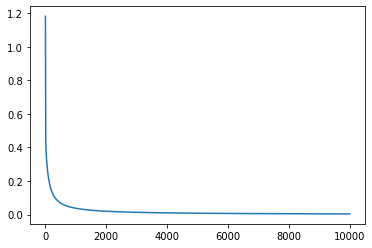

In [ ]:
plt.plot(history)

In [ ]:

yhat = model(X)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == Y).type(torch.float)))

The accuracy:  tensor(1.)


## Example: Heart attack patients


Suppose that we are working with some doctors on heart attack patients. The dependent variable is whether the patient has had a second heart attack ($Y$)within 1 year (yes = 1). We have two independent variables, one is whether the patient completed a treatment consistent of anger control practices ($W_1$) (yes=1). The other is a score on a trait anxiety scale ($W_2$) (a higher score means more anxious). You want to model 

$Y\sim {\rm Ber}(p_i)$

where $p_i=\sigma(x_iW+b)$ with $W=
\left(\begin{matrix}
W_1\\
W_2
\end{matrix}\right).
$
Estimate $W$ and $b$ which best describe the above model.


<img src="https://drive.google.com/uc?id=1LEw9amV_2oOYGP8Uhd7BjeoO956K8l9n" height="600" width="400">

In [ ]:
![picture]("https://drive.google.com/file/d/1LEw9amV_2oOYGP8Uhd7BjeoO956K8l9n/uc?usp=sharing")

/bin/bash: -c: line 0: syntax error near unexpected token `"https://drive.google.com/file/d/1LEw9amV_2oOYGP8Uhd7BjeoO956K8l9n/uc?usp=sharing"'
/bin/bash: -c: line 0: `[picture]("https://drive.google.com/file/d/1LEw9amV_2oOYGP8Uhd7BjeoO956K8l9n/uc?usp=sharing")'
